# Seteo de librerias de utilidad

In [ ]:
pip install tsfresh

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.8/95.8 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.1/169.1 kB 9.9 MB/s eta 0:00:00


# Importación de archivos train.h5 y test.h5

In [ ]:
# Monta Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Ruta a los archivos h5 en Google Drive
folder_path = '/content/drive/My Drive/Machine Learning/project-2-classification-d1/'

train_path = folder_path + 'train.h5'
test_path = folder_path + 'test.h5'

Mounted at /content/drive


# Vistazo a los datasets de los archivos train.h5 y test.h5

In [ ]:
import numpy as np
import pandas as pd
import h5py

# Ruta al archivo h5 train
with h5py.File(train_path, 'r') as f:
    # Lista las claves (nombres de los datasets) en el archivo train.h5
    print("Claves en el archivo h5:", list(f.keys()))

# Ruta al archivo h5 test
with h5py.File(test_path, 'r') as f:
    # Lista las claves (nombres de los datasets) en el archivo test.h5
    print("Claves en el archivo h5:", list(f.keys()))

Claves en el archivo h5: ['body_acc_x', 'body_acc_y', 'body_acc_z', 'body_gyro_x', 'body_gyro_y', 'body_gyro_z', 'total_acc_x', 'total_acc_y', 'total_acc_z', 'y']
Claves en el archivo h5: ['body_acc_x', 'body_acc_y', 'body_acc_z', 'body_gyro_x', 'body_gyro_y', 'body_gyro_z', 'total_acc_x', 'total_acc_y', 'total_acc_z']


# Asignación de variables a los datasets del archivo train.h5

In [ ]:
import numpy as np
import pandas as pd
import h5py

# Ruta al archivo h5 train
with h5py.File(train_path, 'r') as f:
    # Lee los dataset 'x' y los convierte a DataFrames de pandas
    df_body_acc_x = pd.DataFrame(f['body_acc_x'][:])
    df_body_acc_y = pd.DataFrame(f['body_acc_y'][:])
    df_body_acc_z = pd.DataFrame(f['body_acc_z'][:])
    df_body_gyro_x = pd.DataFrame(f['body_gyro_x'][:])
    df_body_gyro_y = pd.DataFrame(f['body_gyro_y'][:])
    df_body_gyro_z = pd.DataFrame(f['body_gyro_z'][:])
    df_total_acc_x = pd.DataFrame(f['total_acc_x'][:])
    df_total_acc_y = pd.DataFrame(f['total_acc_y'][:])
    df_total_acc_z = pd.DataFrame(f['total_acc_z'][:])
    # Lee el dataset 'y' y lo convierte a DataFrame de pandas
    df_y = pd.DataFrame(f['y']).squeeze()

# Imprime las dimensiones de los DataFrames
print("Dimensiones de body_acc_x:", df_body_acc_x.shape)
print("Dimensiones de body_acc_y:", df_body_acc_y.shape)
print("Dimensiones de body_acc_z:", df_body_acc_z.shape)
print("Dimensiones de body_gyro_x:", df_body_gyro_x.shape)
print("Dimensiones de body_gyro_y:", df_body_gyro_y.shape)
print("Dimensiones de body_gyro_z:", df_body_gyro_z.shape)
print("Dimensiones de total_acc_x:", df_total_acc_x.shape)
print("Dimensiones de total_acc_y:", df_total_acc_y.shape)
print("Dimensiones de total_acc_z:", df_total_acc_z.shape)
print("Dimensiones de y:", df_y.shape)

# Imprime los primeros elementos de los DataFrames
# print("Primeros elementos de df_body_acc_x:", df_body_acc_x.head())
# print("Primeros elementos de y:", (df_y.squeeze()))

Dimensiones de body_acc_x: (7352, 128)
Dimensiones de body_acc_y: (7352, 128)
Dimensiones de body_acc_z: (7352, 128)
Dimensiones de body_gyro_x: (7352, 128)
Dimensiones de body_gyro_y: (7352, 128)
Dimensiones de body_gyro_z: (7352, 128)
Dimensiones de total_acc_x: (7352, 128)
Dimensiones de total_acc_y: (7352, 128)
Dimensiones de total_acc_z: (7352, 128)
Dimensiones de y: (7352,)


# Unimos los datasets del archivo train.h5 en uno solo, exceptuando el dataset y
La unión de los datasets dará como resultado una matriz la cual funcionará como nuestro X. Recordar que al usar la función `concat` los keys de las columnas serán las mismas de los datasets a los que pertenecieron. Optaremos por reescribir los keys, solo para prevenir posibles errores que podrían aparecer al trabajar con la libreria `tsfresh`


In [ ]:
df_x = pd.concat([df_body_acc_x, df_body_acc_y, df_body_acc_z,
                  df_body_gyro_x, df_body_gyro_y, df_body_gyro_z,
                  df_total_acc_x, df_total_acc_y, df_total_acc_z], axis=1)
df_x.columns = range(df_x.shape[1])

In [ ]:
print(df_x.keys())

RangeIndex(start=0, stop=1152, step=1)


# Conversión de la variable *df_body_acc_x* a un formato compatible con la librería *tsfresh*

(Nota: Esto se tiene que repetir también con las demás variables del train.h5)

(Nota futura: Al final repetimos aquello pero sobre un dataset que une todas las variables (exceptuando la y) de train.h5)

In [ ]:
print(df_body_acc_x.index)

RangeIndex(start=0, stop=7352, step=1)


In [ ]:
df_body_acc_x['id'] = df_body_acc_x.index
# print(df_body_acc_x)

In [ ]:
print(df_body_acc_x['id'])

0          0
1          1
2          2
3          3
4          4
        ... 
7347    7347
7348    7348
7349    7349
7350    7350
7351    7351
Name: id, Length: 7352, dtype: int64


In [ ]:
long_df_body_acc_x = df_body_acc_x.melt(id_vars=['id'], var_name='time', value_name='value')
# print(long_df_body_acc_x)

# Generación de features de las series temporales
 ``extracted_features``: Son las características extraídas de las series temporales. Estas características pueden incluir estadísticas como la media, la desviación estándar, las frecuencias dominantes, y muchas otras propiedades estadísticas y matemáticas que pueden describir el comportamiento de las series temporales

**Propósito de los extracted_features**
- **Caracterización Completa**: Las características extraídas proporcionan una descripción rica y detallada de las series temporales. Esto puede ser extremadamente útil para el análisis y la construcción de modelos predictivos.

- **Reducción de Dimensionalidad**: En lugar de trabajar con los datos de la serie temporal cruda, que puede ser de alta dimensionalidad, las características extraídas pueden ofrecer una representación más compacta y manejable.

- **Facilitación del Aprendizaje Automático**: Los algoritmos de aprendizaje automático funcionan mejor con características significativas y bien definidas. Las características extraídas pueden mejorar el rendimiento de los modelos al proporcionar estas entradas bien definidas.


In [ ]:
from tsfresh import extract_features

extracted_features = extract_features(long_df_body_acc_x, column_id='id', column_sort='time')

Feature Extraction: 100%|██████████| 7352/7352 [08:51<00:00, 13.84it/s]


In [ ]:
print(extracted_features.head())

   value__variance_larger_than_standard_deviation  value__has_duplicate_max  \
0                                             0.0                       0.0   
1                                             0.0                       0.0   
2                                             0.0                       0.0   
3                                             0.0                       0.0   
4                                             0.0                       0.0   

   value__has_duplicate_min  value__has_duplicate  value__sum_values  \
0                       0.0                   0.0           0.290392   
1                       0.0                   0.0           0.022239   
2                       0.0                   0.0           0.054796   
3                       0.0                   0.0           0.042157   
4                       0.0                   0.0          -0.024980   

   value__abs_energy  value__mean_abs_change  value__mean_change  \
0           0.001766    

In [ ]:
# Shape
print("Shape: \n", extracted_features.shape)
# Descriptive statistics
print("Descriptive statistics: \n", extracted_features.describe())

Shape: 
 (7352, 783)
Descriptive statistics: 
        value__variance_larger_than_standard_deviation  \
count                                          7352.0   
mean                                              0.0   
std                                               0.0   
min                                               0.0   
25%                                               0.0   
50%                                               0.0   
75%                                               0.0   
max                                               0.0   

       value__has_duplicate_max  value__has_duplicate_min  \
count                    7352.0                    7352.0   
mean                        0.0                       0.0   
std                         0.0                       0.0   
min                         0.0                       0.0   
25%                         0.0                       0.0   
50%                         0.0                       0.0   
75%         

In [ ]:
# No ejecutar
# import seaborn as sns
# sns.pairplot(extracted_features)

# Generación de gráficos de series temporales

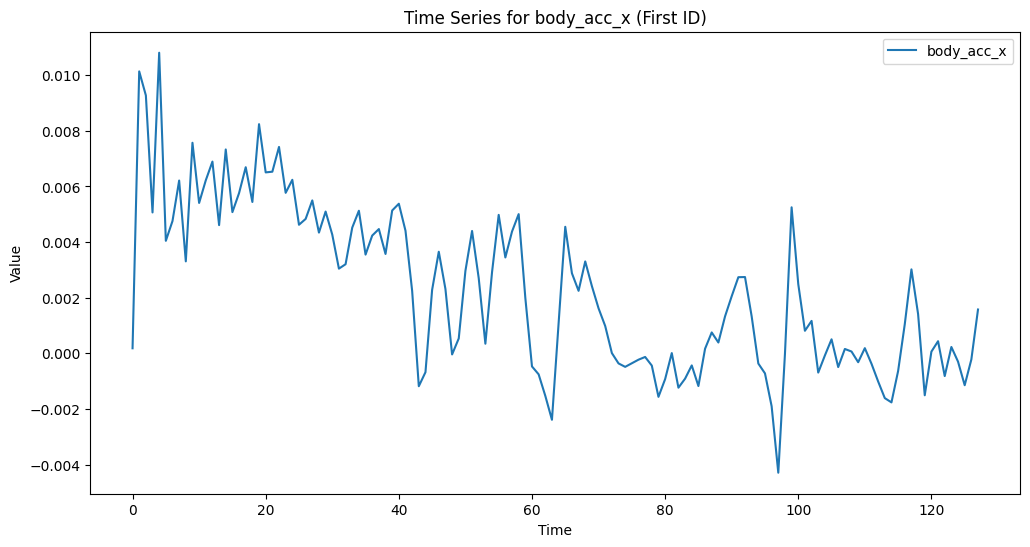

In [ ]:
import matplotlib.pyplot as plt

# Grafica la serie temporal del primer ID (asumiendo que cada ID representa una serie temporal)
plt.figure(figsize=(12, 6))
plt.plot(df_body_acc_x.iloc[0][:-1], label='body_acc_x')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Time Series for body_acc_x (First ID)')
plt.legend()
plt.show()

# Inspección de features importantes

In [ ]:
from tsfresh import select_features
from tsfresh.utilities.dataframe_functions import impute

# Impute missing values
impute(extracted_features)

# 'y' is your target variable
y = df_y

# Selecting important features
important_features = select_features(extracted_features, y)

# Display important features
print(important_features.head())

/usr/local/lib/python3.10/dist-packages/tsfresh/utilities/dataframe_functions.py:198: RuntimeWarning: The columns ['value__fft_coefficient__attr_"real"__coeff_65'
 'value__fft_coefficient__attr_"real"__coeff_66'
 'value__fft_coefficient__attr_"real"__coeff_67'
 'value__fft_coefficient__attr_"real"__coeff_68'
 'value__fft_coefficient__attr_"real"__coeff_69'
 'value__fft_coefficient__attr_"real"__coeff_70'
 'value__fft_coefficient__attr_"real"__coeff_71'
 'value__fft_coefficient__attr_"real"__coeff_72'
 'value__fft_coefficient__attr_"real"__coeff_73'
 'value__fft_coefficient__attr_"real"__coeff_74'
 'value__fft_coefficient__attr_"real"__coeff_75'
 'value__fft_coefficient__attr_"real"__coeff_76'
 'value__fft_coefficient__attr_"real"__coeff_77'
 'value__fft_coefficient__attr_"real"__coeff_78'
 'value__fft_coefficient__attr_"real"__coeff_79'
 'value__fft_coefficient__attr_"real"__coeff_80'
 'value__fft_coefficient__attr_"real"__coeff_81'
 'value__fft_coefficient__attr_"real"__coeff_82'
 'va

   value__change_quantiles__f_agg_"var"__isabs_True__qh_1.0__ql_0.6  \
0                                       2.003572e-06                  
1                                       6.161281e-07                  
2                                       1.576832e-06                  
3                                       1.831032e-06                  
4                                       5.947830e-07                  

   value__change_quantiles__f_agg_"var"__isabs_True__qh_0.8__ql_0.2  \
0                                       6.368649e-07                  
1                                       2.440310e-07                  
2                                       7.243013e-07                  
3                                       4.431304e-07                  
4                                       3.272691e-07                  

   value__change_quantiles__f_agg_"var"__isabs_False__qh_1.0__ql_0.2  \
0                                           0.000005                   
1 

In [ ]:
print(len(important_features.columns))

332


# Selección de features relevantes
(Basicamente lo mismo que inspección de features importantes con pasos de más)

In [ ]:
import pandas as pd
import numpy as np
import h5py
import tsfresh
from tsfresh.feature_selection.relevance import calculate_relevance_table

# Calcula la relevancia de cada característica respecto a la variable objetivo
relevance_table = calculate_relevance_table(extracted_features, df_y)

# Filtra características relevantes
relevant_features = relevance_table[relevance_table.relevant].feature

# Selecciona solo las características relevantes
filtered_features = extracted_features[relevant_features]

In [ ]:
# Imprime la tabla de relevancia
print(relevance_table)

                                                                                              feature  \
feature                                                                                                 
value__change_quantiles__f_agg_"var"__isabs_Tru...  value__change_quantiles__f_agg_"var"__isabs_Tr...   
value__change_quantiles__f_agg_"var"__isabs_Tru...  value__change_quantiles__f_agg_"var"__isabs_Tr...   
value__change_quantiles__f_agg_"var"__isabs_Fal...  value__change_quantiles__f_agg_"var"__isabs_Fa...   
value__change_quantiles__f_agg_"mean"__isabs_Tr...  value__change_quantiles__f_agg_"mean"__isabs_T...   
value__change_quantiles__f_agg_"var"__isabs_Tru...  value__change_quantiles__f_agg_"var"__isabs_Tr...   
...                                                                                               ...   
value__value_count__value_0                                               value__value_count__value_0   
value__value_count__value_1                            

In [ ]:
# Imprime las dimensiones originales y reducidas
print("Dimensiones originales:", extracted_features.shape)
print("Dimensiones después de la selección de características:", filtered_features.shape)

Dimensiones originales: (7352, 783)
Dimensiones después de la selección de características: (7352, 332)


# Almacenamiento de features relevantes

In [ ]:
import os

# Imprimir el directorio de trabajo actual
print("Directorio de trabajo actual:", os.getcwd())

Directorio de trabajo actual: /content


In [ ]:
# Guardar las características extraídas en un archivo CSV
filtered_features.to_csv(folder_path + './relevant-features/train/extracted_features.csv', index=False)
print("Características relevantes extraídas guardadas en 'extracted_features.csv'")

Características relevantes extraídas guardadas en 'extracted_features.csv'


# Replicamos la generación de los features y selección de features relevantes sobre *df_x*

----

Recordar que *df_x* es el dataset que contiene la unión de todos los datasets de train.h5, exceptuando el dataset *df_y*

## Conversión de la variable *df_x* a un formato compatible con la librería *tsfresh*


In [ ]:
df_x['id'] = df_x.index
long_df_x = df_x.melt(id_vars=['id'], var_name='time', value_name='value')

## Generación de features de df_x



In [ ]:
from tsfresh import extract_features

extracted_features_df_x = extract_features(long_df_x, column_id='id', column_sort='time')

Feature Extraction: 100%|██████████| 7352/7352 [2:25:41<00:00,  1.19s/it]


In [ ]:
print(extracted_features_df_x.head())

   value__variance_larger_than_standard_deviation  value__has_duplicate_max  \
0                                             0.0                       0.0   
1                                             0.0                       0.0   
2                                             0.0                       0.0   
3                                             0.0                       0.0   
4                                             0.0                       0.0   

   value__has_duplicate_min  value__has_duplicate  value__sum_values  \
0                       0.0                   1.0         132.913093   
1                       0.0                   0.0         128.371393   
2                       0.0                   1.0         124.528080   
3                       0.0                   1.0         120.814413   
4                       0.0                   1.0         123.163131   

   value__abs_energy  value__mean_abs_change  value__mean_change  \
0         136.504713    

## Almacenamos los features de df_x

In [ ]:
# Guardar las características extraídas en un archivo CSV
extracted_features_df_x.to_csv(folder_path + './relevant-features/train/extracted_features_df_x.csv', index=False)
print("Características relevantes extraídas guardadas en 'extracted_features_df_x.csv'")

Características relevantes extraídas guardadas en 'extracted_features_df_x.csv'


## Inspección de features importantes

In [ ]:
from tsfresh import select_features
from tsfresh.utilities.dataframe_functions import impute

# Impute missing values
impute(extracted_features_df_x)

# 'y' is your target variable
y = df_y

# Selecting important features
important_features_df_x = select_features(extracted_features_df_x, y)

# Display important features
print(important_features_df_x.head())

/usr/local/lib/python3.10/dist-packages/tsfresh/utilities/dataframe_functions.py:198: RuntimeWarning: The columns ['value__query_similarity_count__query_None__threshold_0.0'] did not have any finite values. Filling with zeros.
  warnings.warn(


   value__sum_values  \
0         132.913093   
1         128.371393   
2         124.528080   
3         120.814413   
4         123.163131   

   value__agg_linear_trend__attr_"rvalue"__chunk_len_5__f_agg_"mean"  \
0                                           0.271820                   
1                                           0.272076                   
2                                           0.268473                   
3                                           0.267168                   
4                                           0.263131                   

   value__agg_linear_trend__attr_"rvalue"__chunk_len_5__f_agg_"var"  \
0                                           0.071714                  
1                                           0.071790                  
2                                           0.071480                  
3                                           0.071750                  
4                                           0.071279               

## Selección de features relevantes de *df_x*

In [ ]:
import pandas as pd
import numpy as np
import h5py
import tsfresh
from tsfresh.feature_selection.relevance import calculate_relevance_table

# Calcula la relevancia de cada característica respecto a la variable objetivo
relevance_table_df_x = calculate_relevance_table(extracted_features_df_x, df_y)

# Filtra características relevantes
relevant_features_df_x = relevance_table_df_x[relevance_table_df_x.relevant].feature

# Selecciona solo las características relevantes
filtered_features_df_x = extracted_features_df_x[relevant_features_df_x]

## Almacenamiento de features relevantes de *df_x*

In [ ]:
# Guardar las características extraídas en un archivo CSV
filtered_features_df_x.to_csv(folder_path + './relevant-features/train/filtered_features_df_x.csv', index=False)
print("Características relevantes extraídas guardadas en 'filtered_features_df_x.csv'")

Características relevantes extraídas guardadas en 'filtered_features_df_x.csv'


# Asignación de variables a los datasets del archivo test.h5

In [ ]:
import numpy as np
import pandas as pd
import h5py

# Ruta al archivo h5 test
with h5py.File(test_path, 'r') as f:
    # Lee los dataset 'x' y los convierte a DataFrames de pandas
    df_body_acc_x = pd.DataFrame(f['body_acc_x'][:])
    df_body_acc_y = pd.DataFrame(f['body_acc_y'][:])
    df_body_acc_z = pd.DataFrame(f['body_acc_z'][:])
    df_body_gyro_x = pd.DataFrame(f['body_gyro_x'][:])
    df_body_gyro_y = pd.DataFrame(f['body_gyro_y'][:])
    df_body_gyro_z = pd.DataFrame(f['body_gyro_z'][:])
    df_total_acc_x = pd.DataFrame(f['total_acc_x'][:])
    df_total_acc_y = pd.DataFrame(f['total_acc_y'][:])
    df_total_acc_z = pd.DataFrame(f['total_acc_z'][:])

# Imprime las dimensiones de los DataFrames
print("Dimensiones de body_acc_x:", df_body_acc_x.shape)
print("Dimensiones de body_acc_y:", df_body_acc_y.shape)
print("Dimensiones de body_acc_z:", df_body_acc_z.shape)
print("Dimensiones de body_gyro_x:", df_body_gyro_x.shape)
print("Dimensiones de body_gyro_y:", df_body_gyro_y.shape)
print("Dimensiones de body_gyro_z:", df_body_gyro_z.shape)
print("Dimensiones de total_acc_x:", df_total_acc_x.shape)
print("Dimensiones de total_acc_y:", df_total_acc_y.shape)
print("Dimensiones de total_acc_z:", df_total_acc_z.shape)

# Imprime los primeros elementos de los DataFrames
# print("Primeros elementos de df_body_acc_x:", df_body_acc_x.head())

Dimensiones de body_acc_x: (2947, 128)
Dimensiones de body_acc_y: (2947, 128)
Dimensiones de body_acc_z: (2947, 128)
Dimensiones de body_gyro_x: (2947, 128)
Dimensiones de body_gyro_y: (2947, 128)
Dimensiones de body_gyro_z: (2947, 128)
Dimensiones de total_acc_x: (2947, 128)
Dimensiones de total_acc_y: (2947, 128)
Dimensiones de total_acc_z: (2947, 128)


## Unimos los datasets del archivo test.h5 en uno solo, exceptuando el dataset y
La unión de los datasets dará como resultado una matriz la cual funcionará como nuestro X. Recordar que al usar la función `concat` los keys de las columnas serán las mismas de los datasets a los que pertenecieron. Optaremos por reescribir los keys, solo para prevenir posibles errores que podrían aparecer al trabajar con la libreria `tsfresh`


In [ ]:
df_x = pd.concat([df_body_acc_x, df_body_acc_y, df_body_acc_z,
                  df_body_gyro_x, df_body_gyro_y, df_body_gyro_z,
                  df_total_acc_x, df_total_acc_y, df_total_acc_z], axis=1)
df_x.columns = range(df_x.shape[1])

In [ ]:
print(df_x.shape)

(2947, 1152)


## Conversión de la variable *df_x* a un formato compatible con la librería *tsfresh*

In [ ]:
df_x['id'] = df_x.index
long_df_x = df_x.melt(id_vars=['id'], var_name='time', value_name='value')

## Generación de features de df_x

In [ ]:
from tsfresh import extract_features

extracted_features_df_x = extract_features(long_df_x, column_id='id', column_sort='time')

Feature Extraction: 100%|██████████| 2947/2947 [58:09<00:00,  1.18s/it]


In [ ]:
print(extracted_features_df_x.shape)

(2947, 783)


## Almacenamos los features de df_x

In [ ]:
# Guardar las características extraídas en un archivo CSV
extracted_features_df_x.to_csv(folder_path + './relevant-features/test/extracted_features_df_x.csv', index=False)
print("Características relevantes extraídas guardadas en 'extracted_features_df_x.csv'")

Características relevantes extraídas guardadas en 'extracted_features_df_x.csv'


## Selección de features relevantes de *df_x*

In [ ]:
import pandas as pd
import numpy as np
import h5py
import tsfresh
from tsfresh.feature_selection.relevance import calculate_relevance_table

# Impute missing values
# impute(extracted_features_df_x)

# Trabajamos con el relevance_table_df_x del df_x del training. Filtra características relevantes
relevant_features_df_x = relevance_table_df_x[relevance_table_df_x.relevant].feature

# Selecciona solo las características relevantes
filtered_features_df_x = extracted_features_df_x[relevant_features_df_x]

In [ ]:
print(filtered_features_df_x)

      value__sum_values  \
0            138.061978   
1            113.080511   
2            104.053698   
3            100.892873   
4             98.442652   
...                 ...   
2942          55.563126   
2943          78.381714   
2944          77.508492   
2945          50.515193   
2946          40.550878   

      value__agg_linear_trend__attr_"rvalue"__chunk_len_5__f_agg_"mean"  \
0                                              0.200160                   
1                                              0.223306                   
2                                              0.229066                   
3                                              0.222288                   
4                                              0.214707                   
...                                                 ...                   
2942                                           0.031808                   
2943                                           0.005777                   


## Almacenamiento de features relevantes de *df_x*

In [ ]:
# Guardar las características extraídas en un archivo CSV
filtered_features_df_x.to_csv(folder_path + './relevant-features/test/filtered_features_df_x.csv', index=False)
print("Características relevantes extraídas guardadas en 'filtered_features_df_x.csv'")

Características relevantes extraídas guardadas en 'filtered_features_df_x.csv'


# Modelo Hard SVM

## Librerias necesarias

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cvxopt
import math
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics

## Multiplicadores de Lagrange

----

$\frac{\partial f(x)}{ \partial x} = \lambda \frac{\partial g(  x)}{ \partial x}$

----
Encontrar los valores de $λ_i$ para cada elemento $X_i$ de training.

La función ***GetLambda*** retorna un vector que llamaremos \lambda (vector con los multiplicadores de lagrange), tal que $λ[i]$ será $0$, si el elemento $X[i]$ no se intersecta con cualquiera de las lineas rectas $XW^T + b >=1$ o $XW^T + b >=0$

Nota: $X$ es una matriz, por lo tanto $X_i$ será un vector $K$-dimensional que represente el  $i$-ésimo objeto o punto $k$-dimensional, y  $X_{ij}$ es the $j$-ésimo elemento de el $i$-ésimo objeto.

----


In [ ]:
import numpy as np
from cvxopt import matrix, solvers

def GetLambda(X, y):
    n, m = X.shape
    y = y.astype(float)
    K = np.dot(X, X.T) * np.dot(y, y.T)  # Kernel
    P = matrix(K)
    q = matrix(-np.ones(n))
    G = matrix(-np.eye(n))
    h = matrix(np.zeros(n))
    A = matrix(y.values.reshape(1, -1))
    b = matrix(np.zeros(1))
    sol = solvers.qp(P, q, G, h, A, b)
    alpha = np.array(sol['x'])
    return alpha


## Cálculo de los pesos de W

----

$W_j = \sum_{i=0}^n \lambda_iy_ix_{ij}$  

----
Donde: $λ_i$ representa el $i$-ésimo multiplicador de lagrange, $W_j$ es el $j$-ésimo peso, $x_{ij}$ representa el valor del feature $(j)$ del $(i)-ésimo$ objeto de training, y $y_i$ el el output esperado (1 or -1) para el $i$-ésimimo objeto.

$W_j = \sum_{i=0}^n \lambda_iy_ix_{ij}$  
Notar que la sumatoria solo incluye elementos para el cual el multiplicador de Lagrange $\lambda_i$ es distinto de cero.

----

In [ ]:
def Get_W(X, Y, lambda_list):
    W = np.sum(lambda_list[:len(X)] * Y.values * X.values, axis=0)
    return W

## Encontrando el Bias (b)

$XW^t + b = 0$

$b = - \frac{1}{n}∑_{i=0}^n X_iW^t$

Donde $X_i$ es un vector $k$-dimensional vector que representa al $i$-ésimo objeto, y $k$ es el número de features del objeto.

In [ ]:
def Get_b(X,W):
  return -np.sum(np.dot(X,W.T))/len(X)

## Etapa de Testing

----
Para esta etapa, uno debe solo calcular :

- $f(X_j) = X_jW^t + b$

Pero dado que nosotros ya tenemos calculados los valores de los parámetros $W$ y $b$, entonces por sustitución tenemos:

- $f(X_j) = \sum_{i=0}^n \lambda_iy_i<X_{i},X_{j}> + b$

Donde: $X_i$ es el $i$-ésimo vector de entrenamiento y $X_j$ es el nuevo vector que pasa a través del modelo para predecir la clase (1 or -1)

Finalmente, para determinar a cual clase el nuevo vector $X_j$ pertenece, basta con revisar el signo de f(X_j).

- **Si $f(X_j) >=0$ entonces $Y_j$ = 1 caso contrario $Y_j = -1$**
  
-----

In [ ]:
def Test(X,W,b):
  f_values = np.dot(X,W.T) + b
  y_pred = np.where(f_values >= 0, 1, -1)
  return y_pred

# Creación de csvs de los y

Sea RESTO = WALKING_UPSTAIRS, WALKING_DOWNSTAIRS, SITTING, STANDING, LAYING
- y1: 1 = WALKING y -1 = RESTO

Sea RESTO = WALKING, WALKING_DOWNSTAIRS, SITTING, STANDING, LAYING
- y2: 1 = WALKING_UPSTAIRS y -1 = RESTO

Sea RESTO = WALKING, WALKING_UPSTAIRS, SITTING, STANDING, LAYING
- y3: 1 = WALKING_DOWNSTAIRS y -1 = RESTO

Sea RESTO = WALKING, WALKING_UPSTAIRS, WALKING_DOWNSTAIRS, STANDING, LAYING
- y4: 1 = SITTING y -1 = RESTO

Sea RESTO = WALKING, WALKING_UPSTAIRS, WALKING_DOWNSTAIRS, SITTING, LAYING
- y5: 1 = STANDING y -1 = RESTO

Sea RESTO = WALKING, WALKING_UPSTAIRS, WALKING_DOWNSTAIRS, SITTING, STANDING
- y6: 1 = LAYING y -1 = RESTO

In [ ]:
df_y1 = df_y.apply(lambda x: 1 if x == 1 else -1)
df_y2 = df_y.apply(lambda x: 1 if x == 2 else -1)
df_y3 = df_y.apply(lambda x: 1 if x == 3 else -1)
df_y4 = df_y.apply(lambda x: 1 if x == 4 else -1)
df_y5 = df_y.apply(lambda x: 1 if x == 5 else -1)
df_y6 = df_y.apply(lambda x: 1 if x == 6 else -1)

# Predicción
## Predicción de los y1

In [ ]:
import pandas as pd
import numpy as np

# Ruta a los archivos h5 en Google Drive
feature_vectors_path = '/content/drive/My Drive/Machine Learning/project-2-classification-d1/relevant-features'

train_df_x_path = feature_vectors_path + '/train/filtered_features_df_x.csv'
test_df_x_path = feature_vectors_path + '/test/filtered_features_df_x.csv'

df_x_train = pd.read_csv(train_df_x_path)
df_x_test = pd.read_csv(test_df_x_path)

In [ ]:
y1_train = df_y1.to_frame()
y2_train = df_y2.to_frame()
y3_train = df_y3.to_frame()
y4_train = df_y4.to_frame()
y5_train = df_y5.to_frame()
y6_train = df_y6.to_frame()

In [ ]:
X_train = df_x_train
X_test = df_x_test
Y_train = y1_train

In [ ]:
lambda_list = GetLambda(X_train,Y_train)
sv = lambda_list > 1e-5

     pcost       dcost       gap    pres   dres
 0: -3.3469e+02 -8.5828e+02  4e+04  2e+02  2e+00
 1: -5.2216e+02 -5.7287e+02  2e+04  7e+01  8e-01
 2: -1.6426e+02 -7.4853e+01  4e+03  1e+01  2e-01
 3: -4.1092e+01 -1.1439e+01  7e+02  3e+00  3e-02
 4: -1.1164e+01 -2.1133e+00  2e+02  7e-01  8e-03
 5: -2.0114e+00 -2.6299e-01  3e+01  1e-01  1e-03
 6: -3.0011e-01 -6.2598e-02  5e+00  2e-02  2e-04
 7: -5.1872e-02 -3.7697e-02  1e+00  3e-03  4e-05
 8: -1.2554e-02 -2.5426e-02  3e-01  8e-04  9e-06
 9: -6.3488e-03 -1.7770e-02  1e-01  3e-04  3e-06
10: -5.6452e-03 -1.4349e-02  5e-02  1e-04  1e-06
11: -6.1232e-03 -1.2508e-02  2e-02  5e-05  6e-07
12: -7.0773e-03 -1.1690e-02  1e-02  2e-05  3e-07
13: -8.5003e-03 -1.0887e-02  5e-03  6e-06  8e-08
14: -8.5686e-03 -1.0843e-02  4e-03  4e-06  4e-08
15: -9.5114e-03 -1.0556e-02  1e-03  9e-07  1e-08
16: -9.6815e-03 -1.0517e-02  9e-04  1e-07  2e-09
17: -1.0157e-02 -1.0443e-02  3e-04  3e-08  1e-09
18: -1.0360e-02 -1.0419e-02  6e-05  3e-09  1e-09
19: -1.0401e-02 -1.04

In [ ]:
W = Get_W(X_train, Y_train, lambda_list)
b = Get_b(X_train,W)

# Convert all values greater than 0 to 1, and those less than 0 to -1
Y1_pred  = np.sign(Test(X_test,W,b))

In [ ]:
Y1_pred = pd.DataFrame(Y1_pred)

In [ ]:
# Guardar las predicciones en un archivo CSV
Y1_pred.to_csv(folder_path + './predictions/pred_y1.csv', index=False)
print("Predicciones y1 guardadas en 'pred_y1.csv'")

Predicciones y1 guardadas en 'pred_y1.csv'


In [ ]:
# Guardar los lambda_list asociados a y1 en un archivo CSV
lambda_list = pd.DataFrame(lambda_list)
lambda_list.to_csv(folder_path + './lambda-lists/lambda_y1.csv', index=False)
print("Lambda_list de y1 guardado en 'lambda_y1.csv'")

Lambda_list de y1 guardado en 'lambda_y1.csv'


## Predicción de los y2

In [ ]:
Y_train = y2_train

In [ ]:
lambda_list = GetLambda(X_train,Y_train)
sv = lambda_list > 1e-5

     pcost       dcost       gap    pres   dres
 0: -3.5389e+02 -8.7687e+02  4e+04  2e+02  2e+00
 1: -5.1281e+02 -5.2005e+02  1e+04  6e+01  8e-01
 2: -1.7726e+02 -7.4331e+01  3e+03  1e+01  2e-01
 3: -5.0371e+01 -1.1504e+01  6e+02  2e+00  3e-02
 4: -1.1086e+01 -2.3063e+00  1e+02  5e-01  6e-03
 5: -3.2356e+00 -5.2258e-01  3e+01  1e-01  2e-03
 6: -8.7034e-01 -1.1433e-01  9e+00  3e-02  4e-04
 7: -1.6346e-01 -4.8148e-02  2e+00  7e-03  9e-05
 8: -4.4885e-02 -3.1361e-02  6e-01  2e-03  2e-05
 9: -1.6149e-02 -2.1529e-02  2e-01  5e-04  7e-06
10: -1.0273e-02 -1.6192e-02  1e-01  2e-04  3e-06
11: -8.9516e-03 -1.3091e-02  6e-02  1e-04  2e-06
12: -6.6457e-03 -1.1531e-02  4e-02  8e-05  1e-06
13: -6.8940e-03 -9.3733e-03  2e-02  3e-05  4e-07
14: -6.1595e-03 -8.9510e-03  2e-02  2e-05  3e-07
15: -5.9617e-03 -8.5214e-03  1e-02  1e-05  2e-07
16: -6.1196e-03 -8.1764e-03  6e-03  6e-06  8e-08
17: -6.2894e-03 -8.0553e-03  4e-03  3e-06  4e-08
18: -7.0194e-03 -7.8647e-03  1e-03  8e-07  1e-08
19: -7.4974e-03 -7.78

In [ ]:
W = Get_W(X_train, Y_train, lambda_list)
b = Get_b(X_train,W)

# Convert all values greater than 0 to 1, and those less than 0 to -1
Y2_pred  = np.sign(Test(X_test,W,b))

In [ ]:
Y2_pred = pd.DataFrame(Y2_pred)

In [ ]:
# Guardar las predicciones en un archivo CSV
Y2_pred.to_csv(folder_path + './predictions/pred_y2.csv', index=False)
print("Predicciones y2 guardadas en 'pred_y2.csv'")

Predicciones y2 guardadas en 'pred_y2.csv'


In [ ]:
# Guardar los lambda_list asociados a y2 en un archivo CSV
lambda_list = pd.DataFrame(lambda_list)
lambda_list.to_csv(folder_path + './lambda-lists/lambda_y2.csv', index=False)
print("Lambda_list de y2 guardado en 'lambda_y2.csv'")

Lambda_list de y2 guardado en 'lambda_y2.csv'


## Predicciones y3

In [ ]:
Y_train = y3_train

In [ ]:
lambda_list = GetLambda(X_train,Y_train)
sv = lambda_list > 1e-5

     pcost       dcost       gap    pres   dres
 0: -2.8756e+02 -6.4248e+02  3e+04  2e+02  2e+00
 1: -3.6075e+02 -3.4526e+02  1e+04  6e+01  8e-01
 2: -1.1434e+02 -3.3793e+01  2e+03  1e+01  1e-01
 3: -2.6049e+01 -3.5620e+00  4e+02  2e+00  3e-02
 4: -4.1772e+00 -4.1481e-01  7e+01  3e-01  4e-03
 5: -5.4888e-01 -6.4475e-02  8e+00  4e-02  5e-04
 6: -7.5588e-02 -2.1384e-02  1e+00  6e-03  8e-05
 7: -1.3787e-02 -1.4273e-02  3e-01  1e-03  2e-05
 8: -4.7009e-03 -1.0379e-02  1e-01  3e-04  5e-06
 9: -2.6017e-03 -7.7477e-03  3e-02  1e-04  1e-06
10: -2.9473e-03 -6.2078e-03  1e-02  4e-05  5e-07
11: -3.0466e-03 -5.9391e-03  9e-03  2e-05  3e-07
12: -3.7900e-03 -5.4159e-03  3e-03  5e-06  7e-08
13: -4.1410e-03 -5.2542e-03  1e-03  9e-07  1e-08
14: -4.4345e-03 -5.1120e-03  7e-04  2e-07  3e-09
15: -4.5437e-03 -5.0783e-03  6e-04  9e-08  1e-09
16: -4.6740e-03 -5.0354e-03  4e-04  4e-08  7e-10
17: -4.6864e-03 -5.0294e-03  3e-04  3e-08  6e-10
18: -4.8169e-03 -4.9890e-03  2e-04  1e-08  5e-10
19: -4.8870e-03 -4.97

In [ ]:
W = Get_W(X_train, Y_train, lambda_list)
b = Get_b(X_train,W)

# Convert all values greater than 0 to 1, and those less than 0 to -1
Y3_pred  = np.sign(Test(X_test,W,b))

In [ ]:
Y3_pred = pd.DataFrame(Y3_pred)

In [ ]:
# Guardar las predicciones en un archivo CSV
Y3_pred.to_csv(folder_path + './predictions/pred_y3.csv', index=False)
print("Predicciones y3 guardadas en 'pred_y3.csv'")

Predicciones y3 guardadas en 'pred_y3.csv'


In [ ]:
# Guardar los lambda_list asociados a y3 en un archivo CSV
lambda_list = pd.DataFrame(lambda_list)
lambda_list.to_csv(folder_path + './lambda-lists/lambda_y3.csv', index=False)
print("Lambda_list de y3 guardado en 'lambda_y3.csv'")

Lambda_list de y3 guardado en 'lambda_y3.csv'


## Predicciones y4

In [ ]:
Y_train = y4_train

In [ ]:
lambda_list = GetLambda(X_train,Y_train)
sv = lambda_list > 1e-5

     pcost       dcost       gap    pres   dres
 0: -1.2227e+03 -3.7201e+03  4e+04  2e+02  3e+00
 1: -3.8053e+03 -8.4842e+03  4e+04  1e+02  2e+00
 2: -8.7815e+03 -1.5895e+04  4e+04  1e+02  2e+00
 3: -1.8988e+04 -2.7857e+04  3e+04  8e+01  1e+00
 4: -3.6668e+04 -4.8380e+04  4e+04  8e+01  1e+00
 5: -6.8627e+04 -8.4884e+04  4e+04  7e+01  1e+00
 6: -1.3827e+05 -1.6278e+05  5e+04  7e+01  1e+00
 7: -2.3319e+05 -2.6810e+05  7e+04  7e+01  1e+00
 8: -3.6114e+05 -4.0900e+05  8e+04  7e+01  1e+00
 9: -5.5032e+05 -6.1549e+05  1e+05  6e+01  1e+00
10: -7.1000e+05 -7.8914e+05  1e+05  6e+01  1e+00
11: -9.0947e+05 -1.0047e+06  2e+05  6e+01  1e+00
12: -1.1387e+06 -1.2515e+06  2e+05  6e+01  1e+00
13: -1.3592e+06 -1.4892e+06  2e+05  6e+01  1e+00
14: -1.6151e+06 -1.7672e+06  3e+05  6e+01  1e+00
15: -1.7581e+06 -1.9237e+06  3e+05  6e+01  1e+00
16: -1.8689e+06 -2.0451e+06  4e+05  6e+01  1e+00
17: -1.9929e+06 -2.1817e+06  4e+05  6e+01  1e+00
18: -2.1015e+06 -2.3006e+06  5e+05  6e+01  1e+00
19: -2.2275e+06 -2.44

In [ ]:
W = Get_W(X_train, Y_train, lambda_list)
b = Get_b(X_train,W)

# Convert all values greater than 0 to 1, and those less than 0 to -1
Y4_pred  = np.sign(Test(X_test,W,b))

In [ ]:
Y4_pred = pd.DataFrame(Y4_pred)

In [ ]:
# Guardar las predicciones en un archivo CSV
Y4_pred.to_csv(folder_path + './predictions/pred_y4.csv', index=False)
print("Predicciones y4 guardadas en 'pred_y4.csv'")

Predicciones y4 guardadas en 'pred_y4.csv'


In [ ]:
# Guardar los lambda_list asociados a y4 en un archivo CSV
lambda_list = pd.DataFrame(lambda_list)
lambda_list.to_csv(folder_path + './lambda-lists/lambda_y4.csv', index=False)
print("Lambda_list de y4 guardado en 'lambda_y4.csv'")

Lambda_list de y4 guardado en 'lambda_y4.csv'


## Predicciones y5

In [ ]:
Y_train = y5_train

In [ ]:
lambda_list = GetLambda(X_train,Y_train)
sv = lambda_list > 1e-5

     pcost       dcost       gap    pres   dres
 0: -1.2178e+03 -3.6888e+03  4e+04  2e+02  3e+00
 1: -3.5987e+03 -8.0108e+03  3e+04  1e+02  2e+00
 2: -8.2991e+03 -1.4800e+04  3e+04  9e+01  2e+00
 3: -1.6738e+04 -2.5013e+04  3e+04  8e+01  1e+00
 4: -3.6233e+04 -4.7018e+04  3e+04  7e+01  1e+00
 5: -6.4450e+04 -7.9329e+04  4e+04  6e+01  1e+00
 6: -1.2113e+05 -1.4316e+05  5e+04  6e+01  1e+00
 7: -2.0825e+05 -2.4030e+05  6e+04  6e+01  1e+00
 8: -3.4928e+05 -3.9576e+05  8e+04  6e+01  1e+00
 9: -5.1705e+05 -5.7955e+05  1e+05  6e+01  1e+00
10: -7.0073e+05 -7.7975e+05  1e+05  6e+01  1e+00
11: -8.9502e+05 -9.9115e+05  2e+05  6e+01  1e+00
12: -1.1288e+06 -1.2455e+06  2e+05  6e+01  1e+00
13: -1.3069e+06 -1.4391e+06  2e+05  6e+01  1e+00
14: -1.4634e+06 -1.6111e+06  3e+05  6e+01  1e+00
15: -1.6594e+06 -1.8259e+06  3e+05  6e+01  1e+00
16: -1.8348e+06 -2.0196e+06  4e+05  6e+01  1e+00
17: -1.9156e+06 -2.1121e+06  4e+05  6e+01  1e+00
18: -2.0912e+06 -2.3049e+06  5e+05  5e+01  1e+00
19: -2.2177e+06 -2.44

In [ ]:
W = Get_W(X_train, Y_train, lambda_list)
b = Get_b(X_train,W)

# Convert all values greater than 0 to 1, and those less than 0 to -1
Y5_pred  = np.sign(Test(X_test,W,b))

In [ ]:
Y5_pred = pd.DataFrame(Y5_pred)

In [ ]:
# Guardar las predicciones en un archivo CSV
Y5_pred.to_csv(folder_path + './predictions/pred_y5.csv', index=False)
print("Predicciones y5 guardadas en 'pred_y5.csv'")

Predicciones y5 guardadas en 'pred_y5.csv'


In [ ]:
# Guardar los lambda_list asociados a y5 en un archivo CSV
lambda_list = pd.DataFrame(lambda_list)
lambda_list.to_csv(folder_path + './lambda-lists/lambda_y5.csv', index=False)
print("Lambda_list de y5 guardado en 'lambda_y5.csv'")

Lambda_list de y5 guardado en 'lambda_y5.csv'


## Predicciones y6

In [ ]:
Y_train = y6_train

In [ ]:
lambda_list = GetLambda(X_train,Y_train)
sv = lambda_list > 1e-5

     pcost       dcost       gap    pres   dres
 0: -4.5478e+01 -1.0828e+02  2e+04  1e+02  2e+00
 1: -4.6973e+01 -4.1700e+01  4e+03  2e+01  4e-01
 2: -9.9271e+00 -4.6649e+00  7e+02  3e+00  6e-02
 3: -1.9339e+00 -6.8877e-01  1e+02  5e-01  8e-03
 4: -3.7938e-01 -8.7522e-02  2e+01  7e-02  1e-03
 5: -6.6247e-02 -7.5122e-03  2e+00  1e-02  2e-04
 6: -5.9334e-03 -1.9262e-03  2e-01  1e-03  2e-05
 7: -1.0458e-03 -8.6730e-04  4e-02  2e-04  3e-06
 8: -2.4769e-04 -3.7818e-04  5e-03  2e-05  3e-07
 9: -1.4094e-04 -1.8304e-04  1e-03  5e-06  9e-08
10: -9.7849e-05 -1.6359e-04  9e-04  3e-06  5e-08
11: -8.1118e-05 -1.3803e-04  3e-04  8e-07  1e-08
12: -7.8336e-05 -1.3153e-04  1e-04  2e-07  4e-09
13: -9.1186e-05 -1.2771e-04  5e-05  4e-08  6e-10
14: -9.9767e-05 -1.2470e-04  3e-05  2e-08  3e-10
15: -1.0224e-04 -1.2451e-04  2e-05  6e-09  1e-10
16: -1.1243e-04 -1.2230e-04  1e-05  2e-09  5e-11
17: -1.1649e-04 -1.2156e-04  5e-06  6e-20  4e-11
18: -1.1922e-04 -1.2136e-04  2e-06  3e-20  4e-11
19: -1.2079e-04 -1.21

In [ ]:
W = Get_W(X_train, Y_train, lambda_list)
b = Get_b(X_train,W)

# Convert all values greater than 0 to 1, and those less than 0 to -1
Y6_pred  = np.sign(Test(X_test,W,b))

In [ ]:
Y6_pred = pd.DataFrame(Y6_pred)

In [ ]:
# Guardar las predicciones en un archivo CSV
Y6_pred.to_csv(folder_path + './predictions/pred_y6.csv', index=False)
print("Predicciones y6 guardadas en 'pred_y6.csv'")

Predicciones y6 guardadas en 'pred_y6.csv'


In [ ]:
# Guardar los lambda_list asociados a y6 en un archivo CSV
lambda_list = pd.DataFrame(lambda_list)
lambda_list.to_csv(folder_path + './lambda-lists/lambda_y6.csv', index=False)
print("Lambda_list de y6 guardado en 'lambda_y6.csv'")

Lambda_list de y6 guardado en 'lambda_y6.csv'


## Union de predicciones y1, y2, y3, y4, y5, y6

In [ ]:
import pandas as pd

pred_y1 = pd.read_csv(folder_path + 'predictions/pred_y1.csv')
pred_y2 = pd.read_csv(folder_path + 'predictions/pred_y2.csv')
pred_y3 = pd.read_csv(folder_path + 'predictions/pred_y3.csv')
pred_y4 = pd.read_csv(folder_path + 'predictions/pred_y4.csv')
pred_y5 = pd.read_csv(folder_path + 'predictions/pred_y5.csv')
pred_y6 = pd.read_csv(folder_path + 'predictions/pred_y6.csv')


In [ ]:
pred_y = pred_y1

In [ ]:
for i in range(len(pred_y)):
    if (pred_y.iloc[i, 0] == -1) and (pred_y2.iloc[i, 0]) == 1:
        pred_y.iloc[i, 0] = 2

count_minus_ones = (pred_y['0'] == -1).sum()
print(count_minus_ones)

1086


In [ ]:
for i in range(len(pred_y)):
    if (pred_y.iloc[i, 0] == -1) and (pred_y3.iloc[i, 0]) == 1:
        pred_y.iloc[i, 0] = 3

count_minus_ones = (pred_y['0'] == -1).sum()
print(count_minus_ones)

878


In [ ]:
for i in range(len(pred_y)):
    if (pred_y.iloc[i, 0] == -1) and (pred_y4.iloc[i, 0]) == 1:
        pred_y.iloc[i, 0] = 4

count_minus_ones = (pred_y['0'] == -1).sum()
print(count_minus_ones)

120


In [ ]:
for i in range(len(pred_y)):
    if (pred_y.iloc[i, 0] == -1) and (pred_y5.iloc[i, 0]) == 1:
        pred_y.iloc[i, 0] = 5

count_minus_ones = (pred_y['0'] == -1).sum()
print(count_minus_ones)

70


In [ ]:
for i in range(len(pred_y)):
    if (pred_y.iloc[i, 0] == -1):
        pred_y.iloc[i, 0] = 6

count_minus_ones = (pred_y['0'] == -1).sum()
print(count_minus_ones)

0


## Predicción final

In [ ]:
print(pred_y)

      0
0     1
1     2
2     2
3     1
4     2
...  ..
2942  1
2943  1
2944  1
2945  1
2946  1

[2947 rows x 1 columns]


In [ ]:
# Guardar la predicción final en un archivo CSV
pred_y.to_csv(folder_path + './predictions/pred_y.csv', index=False)
print("Predicción final guardada en 'pred_y.csv'")

Predicción final guardada en 'pred_y.csv'


### Predicción final formateada

In [ ]:
pred_y_formated = pd.read_csv(folder_path + 'predictions/pred_y.csv')
ids = range(1, len(pred_y_formated) + 1)
pred_y_formated.insert(0, 'ID', ids)
pred_y_formated.rename(columns={'0': 'Predicción'}, inplace=True)

In [ ]:
print(pred_y_formated)

        ID  Predicción
0        1           1
1        2           2
2        3           2
3        4           1
4        5           2
...    ...         ...
2942  2943           1
2943  2944           1
2944  2945           1
2945  2946           1
2946  2947           1

[2947 rows x 2 columns]


In [ ]:
# Guardar la predicción final formateada en un archivo CSV
pred_y_formated.to_csv(folder_path + './predictions/pred_y_formated.csv', index=False)
print("Predicción final formateada guardada en 'pred_y_formated.csv'")

Predicción final formateada guardada en 'pred_y_formated.csv'


In [ ]:
print(pred_y_formated.keys())

Index(['ID', 'Predicción'], dtype='object')


# Predicciones del modelo a partir de la seleccion de los y del train
- Objetivo: Generar la matriz de confusión

In [ ]:
# Monta Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Ruta a los archivos h5 en Google Drive
folder_path = '/content/drive/My Drive/Machine Learning/project-2-classification-d1/'

train_path = folder_path + 'train.h5'

In [ ]:
import numpy as np
import pandas as pd
import h5py

# Ruta al archivo h5 train
with h5py.File(train_path, 'r') as f:
    # Lee los dataset 'x' y los convierte a DataFrames de pandas
    df_body_acc_x = pd.DataFrame(f['body_acc_x'][:])
    df_body_acc_y = pd.DataFrame(f['body_acc_y'][:])
    df_body_acc_z = pd.DataFrame(f['body_acc_z'][:])
    df_body_gyro_x = pd.DataFrame(f['body_gyro_x'][:])
    df_body_gyro_y = pd.DataFrame(f['body_gyro_y'][:])
    df_body_gyro_z = pd.DataFrame(f['body_gyro_z'][:])
    df_total_acc_x = pd.DataFrame(f['total_acc_x'][:])
    df_total_acc_y = pd.DataFrame(f['total_acc_y'][:])
    df_total_acc_z = pd.DataFrame(f['total_acc_z'][:])
    # Lee el dataset 'y' y lo convierte a DataFrame de pandas
    df_y = pd.DataFrame(f['y']).squeeze()


In [ ]:
import pandas as pd
import numpy as np

# Ruta a los archivos h5 en Google Drive
feature_vectors_path = '/content/drive/My Drive/Machine Learning/project-2-classification-d1/relevant-features'

train_df_x_path = feature_vectors_path + '/train/filtered_features_df_x.csv'
df_x_train = pd.read_csv(train_df_x_path)

In [ ]:
df_y1 = df_y.apply(lambda x: 1 if x == 1 else -1)
df_y2 = df_y.apply(lambda x: 1 if x == 2 else -1)
df_y3 = df_y.apply(lambda x: 1 if x == 3 else -1)
df_y4 = df_y.apply(lambda x: 1 if x == 4 else -1)
df_y5 = df_y.apply(lambda x: 1 if x == 5 else -1)
df_y6 = df_y.apply(lambda x: 1 if x == 6 else -1)

In [ ]:
X_train = df_x_train
X_test = df_x_test
Y_train = y1_train

In [ ]:
lambda_list = GetLambda(X_train,Y_train)
sv = lambda_list > 1e-5

In [ ]:
W = Get_W(X_train, Y_train, lambda_list)
b = Get_b(X_train,W)

# Convert all values greater than 0 to 1, and those less than 0 to -1
Y1_pred  = np.sign(Test(X_test,W,b))

In [ ]:
Y1_pred = pd.DataFrame(Y1_pred)

## Predicción de los y2

In [ ]:
Y_train = y2_train

In [ ]:
lambda_list = GetLambda(X_train,Y_train)
sv = lambda_list > 1e-5

In [ ]:
W = Get_W(X_train, Y_train, lambda_list)
b = Get_b(X_train,W)

# Convert all values greater than 0 to 1, and those less than 0 to -1
Y2_pred  = np.sign(Test(X_test,W,b))

In [ ]:
Y2_pred = pd.DataFrame(Y2_pred)

## Predicciones y3

In [ ]:
Y_train = y3_train

In [ ]:
lambda_list = GetLambda(X_train,Y_train)
sv = lambda_list > 1e-5

In [ ]:
W = Get_W(X_train, Y_train, lambda_list)
b = Get_b(X_train,W)

# Convert all values greater than 0 to 1, and those less than 0 to -1
Y3_pred  = np.sign(Test(X_test,W,b))

In [ ]:
Y3_pred = pd.DataFrame(Y3_pred)

## Predicciones y4

In [ ]:
Y_train = y4_train

In [ ]:
lambda_list = GetLambda(X_train,Y_train)
sv = lambda_list > 1e-5

In [ ]:
W = Get_W(X_train, Y_train, lambda_list)
b = Get_b(X_train,W)

# Convert all values greater than 0 to 1, and those less than 0 to -1
Y4_pred  = np.sign(Test(X_test,W,b))

In [ ]:
Y4_pred = pd.DataFrame(Y4_pred)

## Predicciones y5

In [ ]:
Y_train = y5_train

In [ ]:
lambda_list = GetLambda(X_train,Y_train)
sv = lambda_list > 1e-5

In [ ]:
W = Get_W(X_train, Y_train, lambda_list)
b = Get_b(X_train,W)

# Convert all values greater than 0 to 1, and those less than 0 to -1
Y5_pred  = np.sign(Test(X_test,W,b))

In [ ]:
Y5_pred = pd.DataFrame(Y5_pred)

## Predicciones y6

In [ ]:
Y_train = y6_train

In [ ]:
lambda_list = GetLambda(X_train,Y_train)
sv = lambda_list > 1e-5

In [ ]:
W = Get_W(X_train, Y_train, lambda_list)
b = Get_b(X_train,W)

# Convert all values greater than 0 to 1, and those less than 0 to -1
Y6_pred  = np.sign(Test(X_test,W,b))

In [ ]:
Y6_pred = pd.DataFrame(Y6_pred)

# Union de las predicciones

In [ ]:
pred_y = pred_y1

In [ ]:
for i in range(len(pred_y)):
    if (pred_y.iloc[i, 0] == -1) and (pred_y2.iloc[i, 0]) == 1:
        pred_y.iloc[i, 0] = 2

count_minus_ones = (pred_y['0'] == -1).sum()
print(count_minus_ones)

In [ ]:
for i in range(len(pred_y)):
    if (pred_y.iloc[i, 0] == -1) and (pred_y3.iloc[i, 0]) == 1:
        pred_y.iloc[i, 0] = 3

count_minus_ones = (pred_y['0'] == -1).sum()
print(count_minus_ones)

In [ ]:
for i in range(len(pred_y)):
    if (pred_y.iloc[i, 0] == -1) and (pred_y4.iloc[i, 0]) == 1:
        pred_y.iloc[i, 0] = 4

count_minus_ones = (pred_y['0'] == -1).sum()
print(count_minus_ones)

In [ ]:
for i in range(len(pred_y)):
    if (pred_y.iloc[i, 0] == -1) and (pred_y5.iloc[i, 0]) == 1:
        pred_y.iloc[i, 0] = 5

count_minus_ones = (pred_y['0'] == -1).sum()
print(count_minus_ones)

In [ ]:
for i in range(len(pred_y)):
    if (pred_y.iloc[i, 0] == -1):
        pred_y.iloc[i, 0] = 6

count_minus_ones = (pred_y['0'] == -1).sum()
print(count_minus_ones)

In [ ]:
print(pred_y)

In [ ]:
npPredY = np.array(pred_y).squeeze()
yTrain = np.array(df_y).squeeze()

## Matriz de confusión

In [ ]:
show_metrics(yTrain, npPredY)